## Processing sensor data from Shale Hills CZO LRMS site ##

Marc Berghouse 8/8/2020

This array includes:
- Apogee Instruments SO-110 O2 sensors
- Eosense EosGP CO2 sensors

Other data includes:
- PRISM daily precipitation




In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt


# Define filenames
infile1 = "../../raw_data/Shale Hills/LRMS/LRMS_CO2_O2.csv" 
infile2 = "../../raw_data/Shale Hills/Precipitation/PRISM_GarnerRun.csv" 


# Read the .dat files as Pandas dataframes and load in the date/times
df1 = pd.read_csv(infile1,  na_values=['NAN',-9999,-99999], parse_dates=[0], index_col=0) 
df2 = pd.read_csv(infile2, na_values=['NAN',-9999,-99999], skiprows=10, parse_dates=[0], index_col=0) 


In [2]:
df2.index=pd.to_datetime(df2.index)

In [3]:
#merge dataframes and drop record columns

df1=df1.drop(columns="RECORD")
df=pd.concat([df1,df2], sort=False)
df

,DiffVolt_1,DiffVolt_2,O2_30,O2_140,T109_1_C,T109_2_C,CO2_30_lo,CO2_30_hi,CO2_30_temp,CO2_140_lo,CO2_140_hi,CO2_140_temp,ppt (mm)
2017-02-20 15:00:00,0.607000,42.919998,-0.903000,17.559999,2.689,3.773,8.108109,32.432430,9.75,4835.1362,5070.2710,10.57,NaN
2017-02-20 16:00:00,44.570000,42.950001,18.030001,17.570000,2.688,3.771,2.702703,5.405406,9.55,4846.6221,5070.2710,10.21,NaN
2017-02-20 17:00:00,45.700001,42.939999,18.510000,17.570000,2.705,3.766,5.405406,10.810810,9.78,4867.5679,5032.4331,10.29,NaN
2017-02-20 18:00:00,45.830002,42.900002,18.570000,17.549999,2.704,3.787,8.108109,32.432430,10.10,4905.4058,5167.5679,10.48,NaN
2017-02-20 19:00:00,45.770000,42.900002,18.540001,17.549999,2.697,3.780,3.378379,8.108109,9.79,4866.8931,5010.8110,10.51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.78
2019-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.14
2019-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04
2019-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [4]:
#Rename all columns with format "var_depth.unit" (SoilTemp_102cm.deg.C)

df.columns=["DiffVolt_30cm.mV", "DiffVolt_140cm.mV", "O2_30cm.percent.0-100", "O2_140cm.percent.0-100",  "ApogeeTemp_30cm.deg.C" , "ApogeeTemp_140cm.deg.C", "CO2lo_30cm.ppm","CO2hi_30cm.ppm", "GPTemp_30cm.deg.C", "CO2lo_140cm.ppm", "CO2hi_140cm.ppm", "GPTemp_140cm.deg.C", "PRISM_precip.mm"]
df

,DiffVolt_30cm.mV,DiffVolt_140cm.mV,O2_30cm.percent.0-100,O2_140cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_140cm.ppm,CO2hi_140cm.ppm,GPTemp_140cm.deg.C,PRISM_precip.mm
2017-02-20 15:00:00,0.607000,42.919998,-0.903000,17.559999,2.689,3.773,8.108109,32.432430,9.75,4835.1362,5070.2710,10.57,NaN
2017-02-20 16:00:00,44.570000,42.950001,18.030001,17.570000,2.688,3.771,2.702703,5.405406,9.55,4846.6221,5070.2710,10.21,NaN
2017-02-20 17:00:00,45.700001,42.939999,18.510000,17.570000,2.705,3.766,5.405406,10.810810,9.78,4867.5679,5032.4331,10.29,NaN
2017-02-20 18:00:00,45.830002,42.900002,18.570000,17.549999,2.704,3.787,8.108109,32.432430,10.10,4905.4058,5167.5679,10.48,NaN
2017-02-20 19:00:00,45.770000,42.900002,18.540001,17.549999,2.697,3.780,3.378379,8.108109,9.79,4866.8931,5010.8110,10.51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.78
2019-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.14
2019-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.04
2019-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00


In [5]:
#masking values that seem erroneous
#There are pros and cons to masking all negative numbers in the dataframe. 
#For this dataset, I think it is a good idea to mask the negative numbers, but you should play around with the mask yourself and investigate

df.mask(df<=-0.01, inplace=True)
df.loc['2018-2-24':]=np.nan

df

,DiffVolt_30cm.mV,DiffVolt_140cm.mV,O2_30cm.percent.0-100,O2_140cm.percent.0-100,ApogeeTemp_30cm.deg.C,ApogeeTemp_140cm.deg.C,CO2lo_30cm.ppm,CO2hi_30cm.ppm,GPTemp_30cm.deg.C,CO2lo_140cm.ppm,CO2hi_140cm.ppm,GPTemp_140cm.deg.C,PRISM_precip.mm
2017-02-20 15:00:00,0.607000,42.919998,NaN,17.559999,2.689,3.773,8.108109,32.432430,9.75,4835.1362,5070.2710,10.57,NaN
2017-02-20 16:00:00,44.570000,42.950001,18.030001,17.570000,2.688,3.771,2.702703,5.405406,9.55,4846.6221,5070.2710,10.21,NaN
2017-02-20 17:00:00,45.700001,42.939999,18.510000,17.570000,2.705,3.766,5.405406,10.810810,9.78,4867.5679,5032.4331,10.29,NaN
2017-02-20 18:00:00,45.830002,42.900002,18.570000,17.549999,2.704,3.787,8.108109,32.432430,10.10,4905.4058,5167.5679,10.48,NaN
2017-02-20 19:00:00,45.770000,42.900002,18.540001,17.549999,2.697,3.780,3.378379,8.108109,9.79,4866.8931,5010.8110,10.51,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-06-20 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-22 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-06-23 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


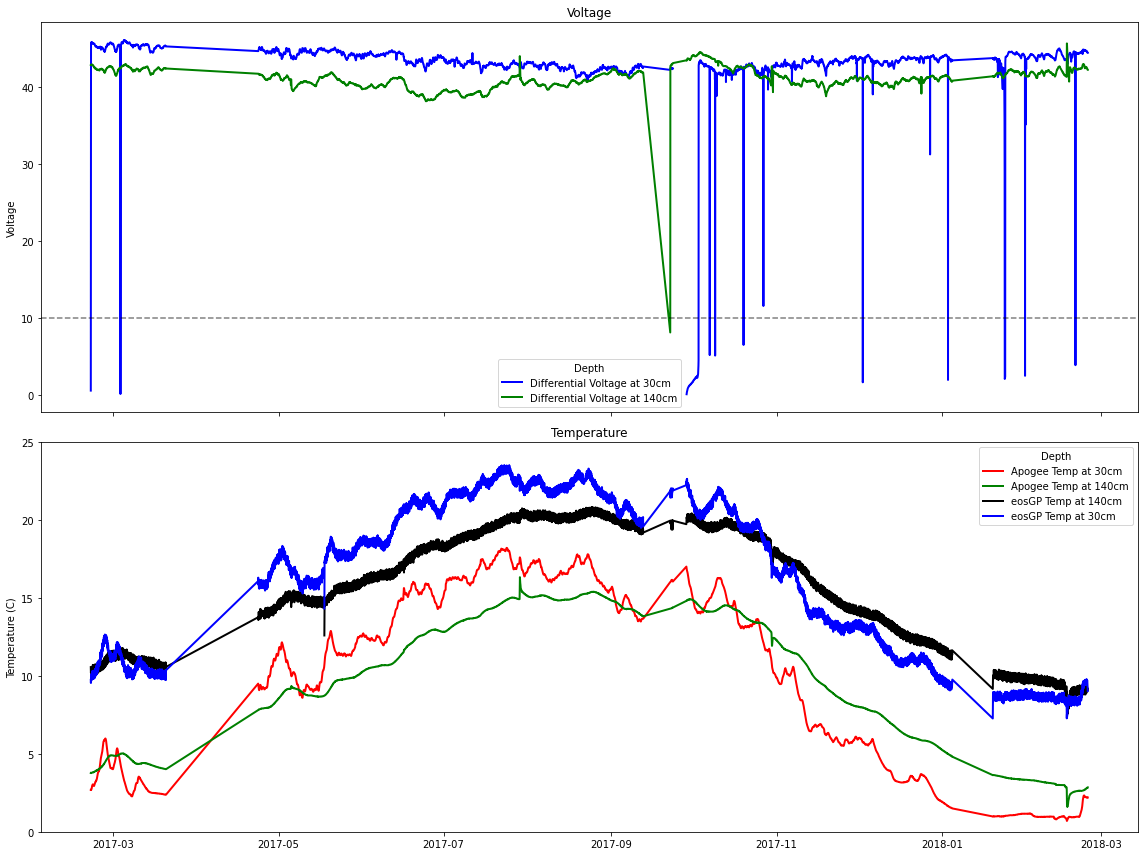

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(16,12), tight_layout=True)

# Apogee SO-110 differntial voltages
ax1.plot(df.index, df['DiffVolt_30cm.mV'], 'b', linewidth=2, label='Differential Voltage at 30cm')
ax1.plot(df.index, df['DiffVolt_140cm.mV'], 'g', linewidth=2, label='Differential Voltage at 140cm')
ax1.set(ylabel='Voltage', title='Voltage')#, ylim=[36,48])
ax1.axhline(y=10, linestyle='--', color='k', alpha=0.5)
ax1.legend(title='Depth', loc='best')

# datalogger temperatures

ax2.plot(df.index, df["ApogeeTemp_30cm.deg.C"], 'r', linewidth=2, label='Apogee Temp at 30cm')
ax2.plot(df.index, df["ApogeeTemp_140cm.deg.C"], 'g', linewidth=2, label='Apogee Temp at 140cm')
ax2.plot(df.index, df['GPTemp_140cm.deg.C'], 'k', linewidth=2, label='eosGP Temp at 140cm')
ax2.plot(df.index, df['GPTemp_30cm.deg.C'], 'b', linewidth=2, label='eosGP Temp at 30cm')
ax2.set(ylabel='Temperature (C)', title='Temperature', ylim=[0,25])
ax2.legend(title='Depth', loc='best')


In [7]:
#Drop unnecessary data 
df=df.drop(columns='DiffVolt_140cm.mV')
df=df.drop(columns='DiffVolt_30cm.mV')
df=df.drop(columns='GPTemp_30cm.deg.C')
df=df.drop(columns='GPTemp_140cm.deg.C')




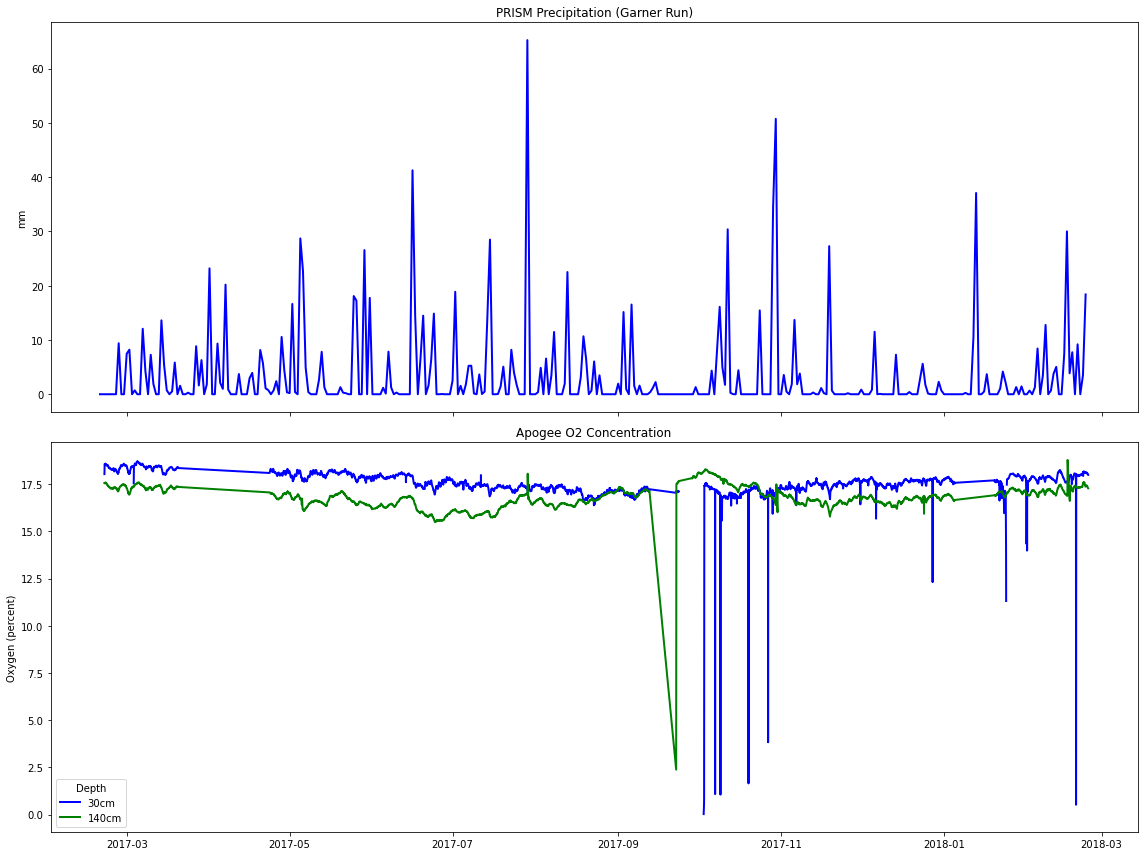

In [8]:
df['PRISM_precip.mm'].loc['2015-6-10':'2017-2-18']=np.nan


fig, (ax1, ax2) = plt.subplots(2, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df.index, df['PRISM_precip.mm'], 'b', linewidth=2)
ax1.set(ylabel='mm', title='PRISM Precipitation (Garner Run)')

ax2.plot(df.index, df['O2_30cm.percent.0-100'], 'b', linewidth=2, label='30cm')
ax2.set(ylabel='Oxygen (percent)', title='Apogee O2 Concentration')
ax2.plot(df.index, df['O2_140cm.percent.0-100'], 'g', linewidth=2, label='140cm')
ax2.legend(title='Depth', loc='best')



In [9]:
#Combine CO2lo and CO2hi
#df['CO2_30cm.ppm'] = np.nan

mask = df['CO2lo_30cm.ppm'] < 5000
df.loc[mask, 'CO2_30cm.ppm'] = df.loc[mask, 'CO2lo_30cm.ppm']
df.loc[~mask, 'CO2_30cm.ppm'] = df.loc[~mask, 'CO2hi_30cm.ppm']
mask2 = df['CO2lo_140cm.ppm'] < 5000
df.loc[mask2, 'CO2_140cm.ppm'] = df.loc[mask2, 'CO2lo_140cm.ppm']
df.loc[~mask2, 'CO2_140cm.ppm'] = df.loc[~mask2, 'CO2hi_140cm.ppm']

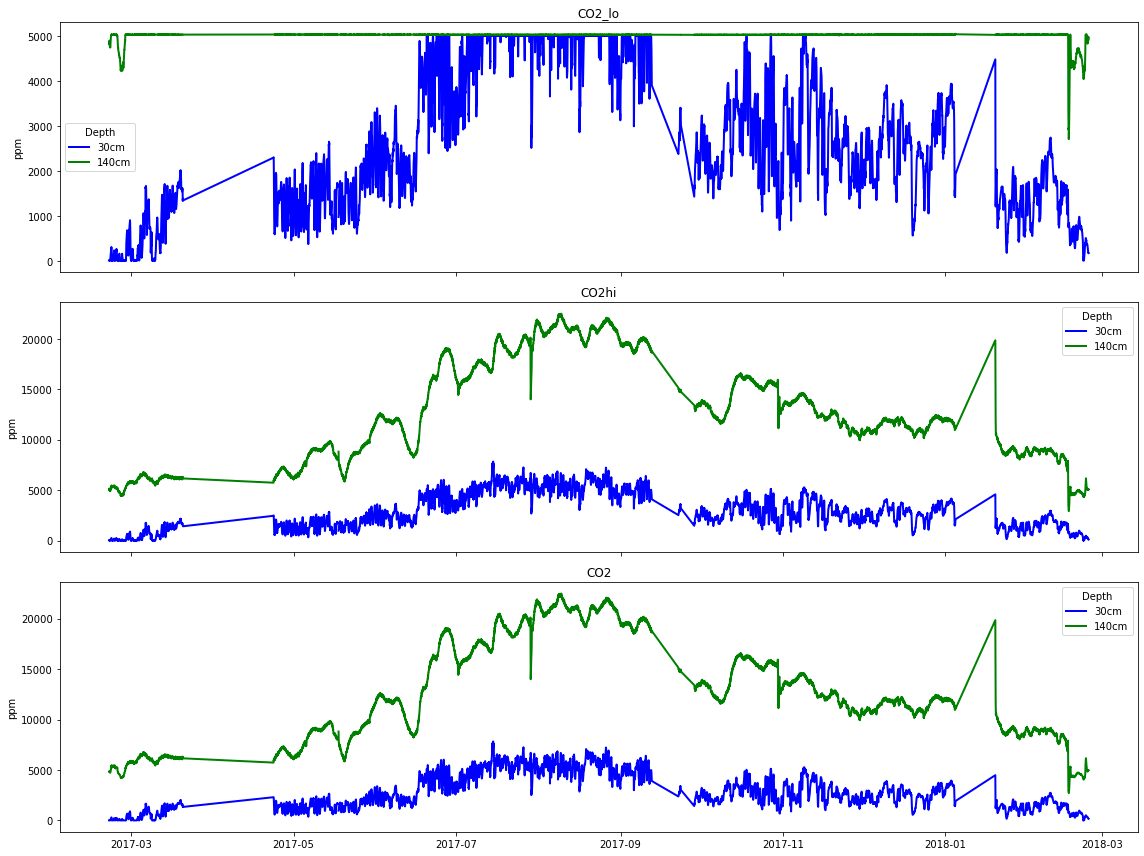

In [10]:
#Plot CO2 data
#We need to make a code that gives us CO2hi_30cm if the value of CO2lo_30cm is greater than 5000ppm, and gives us CO2lo_30cm otherwise
#My appempt is shown below



fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(16,12), sharex=True, tight_layout=True)
ax1.plot(df.index, df['CO2lo_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax1.plot(df.index, df['CO2lo_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax1.set(ylabel='ppm', title='CO2_lo')
ax1.legend(title='Depth', loc='best')
ax2.plot(df.index, df['CO2hi_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax2.plot(df.index, df['CO2hi_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax2.set(ylabel='ppm', title='CO2hi')
ax2.legend(title='Depth', loc='best')
ax3.plot(df.index, df['CO2_30cm.ppm'], 'b', linewidth=2, label='30cm')
ax3.plot(df.index, df['CO2_140cm.ppm'], 'g', linewidth=2, label='140cm')
ax3.set(ylabel='ppm', title='CO2')
ax3.legend(title='Depth', loc='best')

In [11]:
#Drop bad and extraneous CO2 data 
df=df.drop(columns='CO2lo_140cm.ppm')
df=df.drop(columns='CO2hi_140cm.ppm')
df=df.drop(columns='CO2lo_30cm.ppm')
df=df.drop(columns='CO2hi_30cm.ppm')

In [12]:
output=df.copy()
today = dt.date.today()
outfile = '../../processed_data/Shale Hills/LRMS_CO2_O2_processed.csv'
output.to_csv(outfile, na_rep=-99999, index_label='DateTime.MST')

PermissionError: [Errno 13] Permission denied: '../../processed_data/Shale Hills/LRMS_CO2_O2_processed.csv'

In [ ]:
output